In [153]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_csv('data.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [156]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

In [157]:
# lamb = [i/1000 for i in range(1,10000,10)]
lamb = [0.001,0.01,0.1,1,10,100]
cVals = [1/i for i in lamb]

In [158]:
def plot_acc(acc_train, acc_test, lamb):
    plt.xlabel('log of lambda')
    plt.ylabel('accuracy')
    plt.title("Accuracy vs log of lambda.")
    plt.grid()
    plt.scatter(np.log10(lamb),acc_train,color='green', label = "training")
    plt.scatter(np.log10(lamb),acc_test,color='blue', label = "testing")
    plt.legend(['Training Accuracy', 'Test Accuracy'], )
    plt.show(block=False)

In [159]:
def plot_weight(acc_test, weight):
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    print(max_acc, lamb[index])
    weight[index]
    plt.bar([i for i in range(len(weight[0]))],weight[index])

In [160]:
from sklearn import svm
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train, Y_train)

    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    acc_train_svm_linear.append(acc_train)
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)

    acc_test_svm_linear.append(acc_test)
    weight_svm_linear.append(svc_linear.coef_[0])
    intercept_svm_linear.append(svc_linear.intercept_)

In [161]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c)

0.8011647254575707 0.001


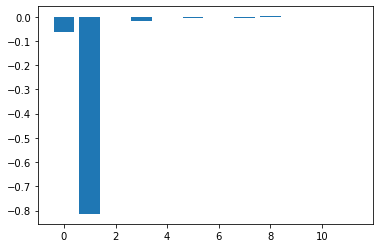

In [162]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

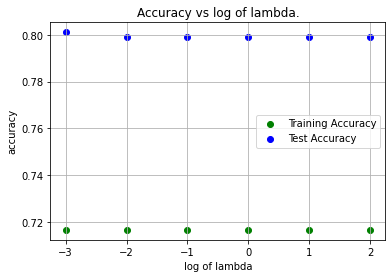

In [163]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [164]:
def svm_rbf(c):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(X_train, Y_train)
   
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    acc_train_svm_rbf.append(acc_train)
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    acc_test_svm_rbf.append(acc_test)

In [165]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
for c in cVals:
    svm_rbf(c)


In [166]:
max_acc = max(acc_test_svm_rbf)
index = acc_test_svm_rbf.index(max_acc)
print(max_acc, lamb[index])

0.8306988352745425 10


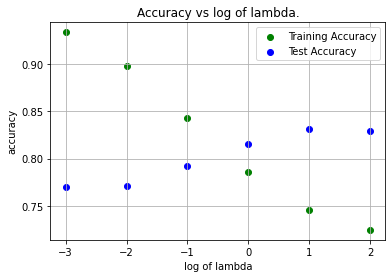

In [167]:
plot_acc(acc_train_svm_rbf, acc_test_svm_rbf, lamb)

In [168]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial.fit(X_train,Y_train)
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = svc_polynomial.score(X_train,Y_train)
    acc_train_svm_poly.append(acc_train)
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = svc_polynomial.score(X_test,Y_test)
    acc_test_svm_poly.append(acc_test)

In [169]:
acc_train_svm_poly = []
acc_test_svm_poly = []
for c in cVals:
    svm_polynomial(c)

In [170]:
max_acc = max(acc_test_svm_poly)
index = acc_test_svm_poly.index(max_acc)
print(max_acc, lamb[index])

0.8402662229617305 100


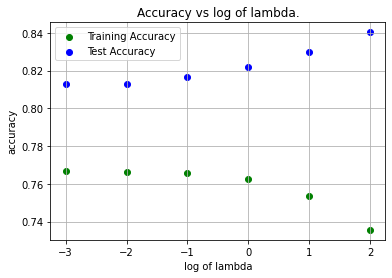

In [171]:
plot_acc(acc_train_svm_poly, acc_test_svm_poly, lamb)

In [172]:
def svm_linear(c,penalty):
    svm_linear = svm.LinearSVC(penalty=penalty,C = c, max_iter=4000,dual=False)
    svm_linear.fit(X_train, Y_train)


    acc_train = svm_linear.score(X_train, Y_train)
    
    acc_train_svm_linear.append(acc_train)
    
  
    acc_test = svm_linear.score(X_test, Y_test)

    acc_test_svm_linear.append(acc_test)
    weight_svm_linear.append(svm_linear.coef_[0])
    intercept_svm_linear.append(svm_linear.intercept_)

In [173]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c,"l1")

0.7820299500831946 0.001


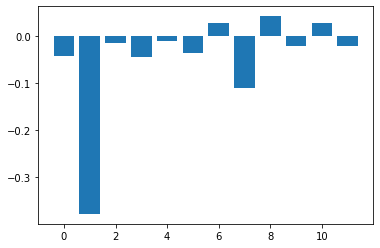

In [174]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

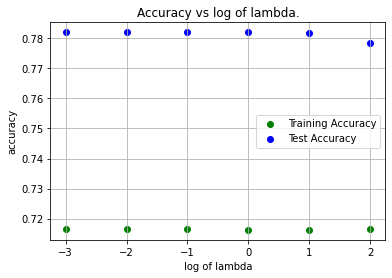

In [175]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [176]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c,"l2")

0.7820299500831946 0.001


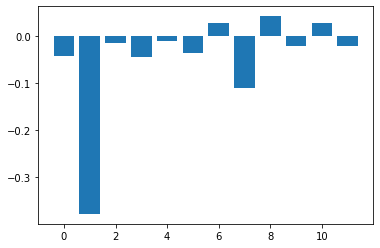

In [177]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

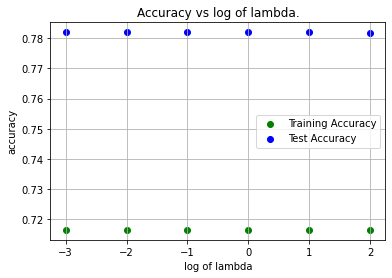

In [178]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)